# Multiclass Classification with PyTorch - Iris Dataset

Ref. Machine Learning Mastery Tutorial

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tqdm
import copy

In [2]:
torch.__version__

'1.10.1'

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda_version

'11.3'

In [5]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/iris.csv")

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.target.unique()

array([0., 1., 2.])

In [10]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [11]:
X = df.drop(columns = ["target"],axis = 1)
y = df[["target"]]
print(X.shape, y.shape)

(150, 4) (150, 1)


In [12]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit_transform(y)
ohe[0:10]

C:\Users\imoge\Anaconda3\envs\PYTORCH\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
X.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
# Create tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(ohe, dtype=torch.float32)

# Train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, train_size=0.8, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([120, 4]) torch.Size([30, 4]) torch.Size([120, 3]) torch.Size([30, 3])


## Build the Network

In [49]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.activation = nn.ReLU()
        self.output = nn.Linear(8, 3)
        
    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x
    
model = Multiclass()

In [50]:
# Specify loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 0: 100%|██████████| 24/24 [00:00<00:00, 700.40batch/s, acc=0.4, loss=1.27] 


Epoch 0 validation: Cross-entropy=0.91, Accuracy=76.7%


Epoch 1: 100%|██████████| 24/24 [00:00<00:00, 519.50batch/s, acc=0.4, loss=1.24] 


Epoch 1 validation: Cross-entropy=0.89, Accuracy=76.7%


Epoch 2: 100%|██████████| 24/24 [00:00<00:00, 772.14batch/s, acc=0.4, loss=1.21] 


Epoch 2 validation: Cross-entropy=0.86, Accuracy=76.7%


Epoch 3: 100%|██████████| 24/24 [00:00<00:00, 625.90batch/s, acc=0.4, loss=1.18] 


Epoch 3 validation: Cross-entropy=0.84, Accuracy=76.7%


Epoch 4: 100%|██████████| 24/24 [00:00<00:00, 651.07batch/s, acc=0.4, loss=1.16] 


Epoch 4 validation: Cross-entropy=0.82, Accuracy=76.7%


Epoch 5: 100%|██████████| 24/24 [00:00<00:00, 795.51batch/s, acc=0.4, loss=1.14] 


Epoch 5 validation: Cross-entropy=0.79, Accuracy=76.7%


Epoch 6: 100%|██████████| 24/24 [00:00<00:00, 484.12batch/s, acc=0.4, loss=1.12] 


Epoch 6 validation: Cross-entropy=0.77, Accuracy=76.7%


Epoch 7: 100%|██████████| 24/24 [00:00<00:00, 775.87batch/s, acc=0.4, loss=1.09] 


Epoch 7 validation: Cross-entropy=0.74, Accuracy=76.7%


Epoch 8: 100%|██████████| 24/24 [00:00<00:00, 623.24batch/s, acc=0.4, loss=1.07] 


Epoch 8 validation: Cross-entropy=0.72, Accuracy=76.7%


Epoch 9: 100%|██████████| 24/24 [00:00<00:00, 514.40batch/s, acc=0.4, loss=1.04] 


Epoch 9 validation: Cross-entropy=0.69, Accuracy=76.7%


Epoch 10: 100%|██████████| 24/24 [00:00<00:00, 763.50batch/s, acc=0.4, loss=1.01] 


Epoch 10 validation: Cross-entropy=0.67, Accuracy=76.7%


Epoch 11: 100%|██████████| 24/24 [00:00<00:00, 467.18batch/s, acc=0.4, loss=0.978]


Epoch 11 validation: Cross-entropy=0.64, Accuracy=76.7%


Epoch 12: 100%|██████████| 24/24 [00:00<00:00, 775.57batch/s, acc=0.4, loss=0.945]


Epoch 12 validation: Cross-entropy=0.62, Accuracy=76.7%


Epoch 13: 100%|██████████| 24/24 [00:00<00:00, 483.98batch/s, acc=0.4, loss=0.911]


Epoch 13 validation: Cross-entropy=0.60, Accuracy=76.7%


Epoch 14: 100%|██████████| 24/24 [00:00<00:00, 756.55batch/s, acc=0.4, loss=0.879]


Epoch 14 validation: Cross-entropy=0.58, Accuracy=76.7%


Epoch 15: 100%|██████████| 24/24 [00:00<00:00, 721.05batch/s, acc=0.4, loss=0.85] 


Epoch 15 validation: Cross-entropy=0.57, Accuracy=76.7%


Epoch 16: 100%|██████████| 24/24 [00:00<00:00, 671.74batch/s, acc=0.4, loss=0.823]


Epoch 16 validation: Cross-entropy=0.55, Accuracy=76.7%


Epoch 17: 100%|██████████| 24/24 [00:00<00:00, 749.95batch/s, acc=0.4, loss=0.8]  


Epoch 17 validation: Cross-entropy=0.54, Accuracy=76.7%


Epoch 18: 100%|██████████| 24/24 [00:00<00:00, 610.61batch/s, acc=0.4, loss=0.778]


Epoch 18 validation: Cross-entropy=0.53, Accuracy=80.0%


Epoch 19: 100%|██████████| 24/24 [00:00<00:00, 551.67batch/s, acc=0.4, loss=0.758]


Epoch 19 validation: Cross-entropy=0.51, Accuracy=80.0%


Epoch 20: 100%|██████████| 24/24 [00:00<00:00, 670.82batch/s, acc=0.4, loss=0.74] 


Epoch 20 validation: Cross-entropy=0.50, Accuracy=86.7%


Epoch 21: 100%|██████████| 24/24 [00:00<00:00, 709.88batch/s, acc=0.4, loss=0.724]


Epoch 21 validation: Cross-entropy=0.49, Accuracy=90.0%


Epoch 22: 100%|██████████| 24/24 [00:00<00:00, 523.58batch/s, acc=0.4, loss=0.709]


Epoch 22 validation: Cross-entropy=0.48, Accuracy=90.0%


Epoch 23: 100%|██████████| 24/24 [00:00<00:00, 705.03batch/s, acc=0.4, loss=0.695]


Epoch 23 validation: Cross-entropy=0.47, Accuracy=90.0%


Epoch 24: 100%|██████████| 24/24 [00:00<00:00, 635.36batch/s, acc=0.4, loss=0.683]


Epoch 24 validation: Cross-entropy=0.46, Accuracy=93.3%


Epoch 25: 100%|██████████| 24/24 [00:00<00:00, 600.15batch/s, acc=0.4, loss=0.671]


Epoch 25 validation: Cross-entropy=0.45, Accuracy=93.3%


Epoch 26: 100%|██████████| 24/24 [00:00<00:00, 705.83batch/s, acc=0.4, loss=0.66] 


Epoch 26 validation: Cross-entropy=0.44, Accuracy=93.3%


Epoch 27: 100%|██████████| 24/24 [00:00<00:00, 719.04batch/s, acc=0.6, loss=0.65] 


Epoch 27 validation: Cross-entropy=0.43, Accuracy=96.7%


Epoch 28: 100%|██████████| 24/24 [00:00<00:00, 492.43batch/s, acc=0.6, loss=0.641]


Epoch 28 validation: Cross-entropy=0.42, Accuracy=96.7%


Epoch 29: 100%|██████████| 24/24 [00:00<00:00, 715.00batch/s, acc=0.6, loss=0.632]


Epoch 29 validation: Cross-entropy=0.41, Accuracy=96.7%


Epoch 30: 100%|██████████| 24/24 [00:00<00:00, 712.44batch/s, acc=0.6, loss=0.623]


Epoch 30 validation: Cross-entropy=0.40, Accuracy=96.7%


Epoch 31: 100%|██████████| 24/24 [00:00<00:00, 501.93batch/s, acc=0.6, loss=0.616]


Epoch 31 validation: Cross-entropy=0.40, Accuracy=96.7%


Epoch 32: 100%|██████████| 24/24 [00:00<00:00, 713.53batch/s, acc=0.6, loss=0.608]


Epoch 32 validation: Cross-entropy=0.39, Accuracy=100.0%


Epoch 33: 100%|██████████| 24/24 [00:00<00:00, 729.05batch/s, acc=0.6, loss=0.601]


Epoch 33 validation: Cross-entropy=0.38, Accuracy=100.0%


Epoch 34: 100%|██████████| 24/24 [00:00<00:00, 717.30batch/s, acc=0.6, loss=0.594]


Epoch 34 validation: Cross-entropy=0.38, Accuracy=100.0%


Epoch 35: 100%|██████████| 24/24 [00:00<00:00, 695.21batch/s, acc=0.6, loss=0.588]


Epoch 35 validation: Cross-entropy=0.37, Accuracy=100.0%


Epoch 36: 100%|██████████| 24/24 [00:00<00:00, 626.23batch/s, acc=0.6, loss=0.582]


Epoch 36 validation: Cross-entropy=0.36, Accuracy=100.0%


Epoch 37: 100%|██████████| 24/24 [00:00<00:00, 607.48batch/s, acc=0.6, loss=0.576]


Epoch 37 validation: Cross-entropy=0.36, Accuracy=100.0%


Epoch 38: 100%|██████████| 24/24 [00:00<00:00, 644.27batch/s, acc=0.6, loss=0.571]


Epoch 38 validation: Cross-entropy=0.35, Accuracy=100.0%


Epoch 39: 100%|██████████| 24/24 [00:00<00:00, 710.37batch/s, acc=0.6, loss=0.565]


Epoch 39 validation: Cross-entropy=0.35, Accuracy=100.0%


Epoch 40: 100%|██████████| 24/24 [00:00<00:00, 747.63batch/s, acc=0.6, loss=0.56] 


Epoch 40 validation: Cross-entropy=0.34, Accuracy=100.0%


Epoch 41: 100%|██████████| 24/24 [00:00<00:00, 490.60batch/s, acc=0.6, loss=0.555]


Epoch 41 validation: Cross-entropy=0.34, Accuracy=100.0%


Epoch 42: 100%|██████████| 24/24 [00:00<00:00, 753.06batch/s, acc=0.6, loss=0.551]


Epoch 42 validation: Cross-entropy=0.33, Accuracy=100.0%


Epoch 43: 100%|██████████| 24/24 [00:00<00:00, 721.73batch/s, acc=0.6, loss=0.546]


Epoch 43 validation: Cross-entropy=0.33, Accuracy=100.0%


Epoch 44: 100%|██████████| 24/24 [00:00<00:00, 479.48batch/s, acc=0.6, loss=0.542]


Epoch 44 validation: Cross-entropy=0.32, Accuracy=100.0%


Epoch 45: 100%|██████████| 24/24 [00:00<00:00, 721.99batch/s, acc=0.6, loss=0.537]


Epoch 45 validation: Cross-entropy=0.32, Accuracy=100.0%


Epoch 46: 100%|██████████| 24/24 [00:00<00:00, 692.39batch/s, acc=0.6, loss=0.533]


Epoch 46 validation: Cross-entropy=0.31, Accuracy=100.0%


Epoch 47: 100%|██████████| 24/24 [00:00<00:00, 715.00batch/s, acc=0.8, loss=0.529]


Epoch 47 validation: Cross-entropy=0.31, Accuracy=100.0%


Epoch 48: 100%|██████████| 24/24 [00:00<00:00, 688.77batch/s, acc=0.8, loss=0.525]


Epoch 48 validation: Cross-entropy=0.30, Accuracy=100.0%


Epoch 49: 100%|██████████| 24/24 [00:00<00:00, 610.62batch/s, acc=0.8, loss=0.521]


Epoch 49 validation: Cross-entropy=0.30, Accuracy=100.0%


Epoch 50: 100%|██████████| 24/24 [00:00<00:00, 925.14batch/s, acc=0.8, loss=0.517]


Epoch 50 validation: Cross-entropy=0.30, Accuracy=100.0%


Epoch 51: 100%|██████████| 24/24 [00:00<00:00, 696.59batch/s, acc=0.8, loss=0.514]


Epoch 51 validation: Cross-entropy=0.29, Accuracy=100.0%


Epoch 52: 100%|██████████| 24/24 [00:00<00:00, 724.49batch/s, acc=0.8, loss=0.51]


Epoch 52 validation: Cross-entropy=0.29, Accuracy=100.0%


Epoch 53: 100%|██████████| 24/24 [00:00<00:00, 685.67batch/s, acc=0.8, loss=0.507]


Epoch 53 validation: Cross-entropy=0.28, Accuracy=100.0%


Epoch 54: 100%|██████████| 24/24 [00:00<00:00, 481.44batch/s, acc=0.8, loss=0.503]


Epoch 54 validation: Cross-entropy=0.28, Accuracy=100.0%


Epoch 55: 100%|██████████| 24/24 [00:00<00:00, 721.65batch/s, acc=0.8, loss=0.5]  


Epoch 55 validation: Cross-entropy=0.28, Accuracy=100.0%


Epoch 56:  62%|██████▎   | 15/24 [00:00<00:00, 63.48batch/s, acc=1, loss=0.259]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 89: 100%|██████████| 24/24 [00:00<00:00, 627.67batch/s, acc=0.8, loss=0.41] 


Epoch 89 validation: Cross-entropy=0.18, Accuracy=100.0%


Epoch 90: 100%|██████████| 24/24 [00:00<00:00, 735.45batch/s, acc=0.8, loss=0.407]


Epoch 90 validation: Cross-entropy=0.18, Accuracy=100.0%


Epoch 91: 100%|██████████| 24/24 [00:00<00:00, 544.90batch/s, acc=0.8, loss=0.405]


Epoch 91 validation: Cross-entropy=0.18, Accuracy=100.0%


Epoch 92: 100%|██████████| 24/24 [00:00<00:00, 681.25batch/s, acc=0.8, loss=0.403]


Epoch 92 validation: Cross-entropy=0.18, Accuracy=100.0%


Epoch 93: 100%|██████████| 24/24 [00:00<00:00, 715.34batch/s, acc=0.8, loss=0.401]


Epoch 93 validation: Cross-entropy=0.17, Accuracy=100.0%


Epoch 94: 100%|██████████| 24/24 [00:00<00:00, 758.32batch/s, acc=0.8, loss=0.399]


Epoch 94 validation: Cross-entropy=0.17, Accuracy=100.0%


Epoch 95: 100%|██████████| 24/24 [00:00<00:00, 480.69batch/s, acc=0.8, loss=0.397]


Epoch 95 validation: Cross-entropy=0.17, Accuracy=100.0%


Epoch 96: 100%|██████████| 24/24 [00:00<00:00, 720.21batch/s, acc=0.8, loss=0.395]


Epoch 96 validation: Cross-entropy=0.17, Accuracy=100.0%


Epoch 97: 100%|██████████| 24/24 [00:00<00:00, 690.71batch/s, acc=0.8, loss=0.393]


Epoch 97 validation: Cross-entropy=0.17, Accuracy=100.0%


Epoch 98: 100%|██████████| 24/24 [00:00<00:00, 504.57batch/s, acc=0.8, loss=0.392]


Epoch 98 validation: Cross-entropy=0.16, Accuracy=100.0%


Epoch 99: 100%|██████████| 24/24 [00:00<00:00, 716.41batch/s, acc=0.8, loss=0.39] 


Epoch 99 validation: Cross-entropy=0.16, Accuracy=100.0%


Epoch 100: 100%|██████████| 24/24 [00:00<00:00, 690.93batch/s, acc=0.8, loss=0.388]


Epoch 100 validation: Cross-entropy=0.16, Accuracy=100.0%


Epoch 101: 100%|██████████| 24/24 [00:00<00:00, 718.14batch/s, acc=0.8, loss=0.386]


Epoch 101 validation: Cross-entropy=0.16, Accuracy=100.0%


Epoch 102: 100%|██████████| 24/24 [00:00<00:00, 721.21batch/s, acc=0.8, loss=0.384]


Epoch 102 validation: Cross-entropy=0.16, Accuracy=100.0%


Epoch 103: 100%|██████████| 24/24 [00:00<00:00, 545.12batch/s, acc=0.8, loss=0.382]


Epoch 103 validation: Cross-entropy=0.15, Accuracy=100.0%


Epoch 104: 100%|██████████| 24/24 [00:00<00:00, 628.29batch/s, acc=0.8, loss=0.381]


Epoch 104 validation: Cross-entropy=0.15, Accuracy=100.0%


Epoch 105: 100%|██████████| 24/24 [00:00<00:00, 719.28batch/s, acc=0.8, loss=0.379]


Epoch 105 validation: Cross-entropy=0.15, Accuracy=100.0%


Epoch 106: 100%|██████████| 24/24 [00:00<00:00, 722.42batch/s, acc=0.8, loss=0.377]


Epoch 106 validation: Cross-entropy=0.15, Accuracy=100.0%


Epoch 107: 100%|██████████| 24/24 [00:00<00:00, 483.47batch/s, acc=0.8, loss=0.376]


Epoch 107 validation: Cross-entropy=0.15, Accuracy=100.0%


Epoch 108: 100%|██████████| 24/24 [00:00<00:00, 625.48batch/s, acc=0.8, loss=0.374]


Epoch 108 validation: Cross-entropy=0.15, Accuracy=100.0%


Epoch 109: 100%|██████████| 24/24 [00:00<00:00, 838.68batch/s, acc=0.8, loss=0.372]


Epoch 109 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 110: 100%|██████████| 24/24 [00:00<00:00, 710.57batch/s, acc=0.8, loss=0.371]


Epoch 110 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 111: 100%|██████████| 24/24 [00:00<00:00, 689.05batch/s, acc=0.8, loss=0.369]


Epoch 111 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 112: 100%|██████████| 24/24 [00:00<00:00, 754.59batch/s, acc=0.8, loss=0.367]


Epoch 112 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 113: 100%|██████████| 24/24 [00:00<00:00, 490.53batch/s, acc=0.8, loss=0.366]


Epoch 113 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 114: 100%|██████████| 24/24 [00:00<00:00, 682.01batch/s, acc=0.8, loss=0.364]


Epoch 114 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 115: 100%|██████████| 24/24 [00:00<00:00, 743.03batch/s, acc=0.8, loss=0.363]


Epoch 115 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 116: 100%|██████████| 24/24 [00:00<00:00, 763.81batch/s, acc=0.8, loss=0.361]


Epoch 116 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 117: 100%|██████████| 24/24 [00:00<00:00, 650.09batch/s, acc=0.8, loss=0.36]


Epoch 117 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 118: 100%|██████████| 24/24 [00:00<00:00, 867.49batch/s, acc=0.8, loss=0.358]


Epoch 118 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 119: 100%|██████████| 24/24 [00:00<00:00, 688.68batch/s, acc=0.8, loss=0.357]


Epoch 119 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 120: 100%|██████████| 24/24 [00:00<00:00, 478.01batch/s, acc=0.8, loss=0.355]


Epoch 120 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 121: 100%|██████████| 24/24 [00:00<00:00, 759.91batch/s, acc=0.8, loss=0.354]


Epoch 121 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 122: 100%|██████████| 24/24 [00:00<00:00, 689.61batch/s, acc=0.8, loss=0.353]


Epoch 122 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 123: 100%|██████████| 24/24 [00:00<00:00, 658.06batch/s, acc=0.8, loss=0.351]


Epoch 123 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 124: 100%|██████████| 24/24 [00:00<00:00, 688.98batch/s, acc=0.8, loss=0.35] 


Epoch 124 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 125: 100%|██████████| 24/24 [00:00<00:00, 718.37batch/s, acc=0.8, loss=0.348]


Epoch 125 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 126: 100%|██████████| 24/24 [00:00<00:00, 495.82batch/s, acc=0.8, loss=0.347]


Epoch 126 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 127: 100%|██████████| 24/24 [00:00<00:00, 690.37batch/s, acc=0.8, loss=0.346]


Epoch 127 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 128: 100%|██████████| 24/24 [00:00<00:00, 751.90batch/s, acc=0.8, loss=0.344]


Epoch 128 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 129: 100%|██████████| 24/24 [00:00<00:00, 721.11batch/s, acc=0.8, loss=0.343]


Epoch 129 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 130: 100%|██████████| 24/24 [00:00<00:00, 731.42batch/s, acc=0.8, loss=0.342]


Epoch 130 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 131: 100%|██████████| 24/24 [00:00<00:00, 687.92batch/s, acc=0.8, loss=0.341]


Epoch 131 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 132: 100%|██████████| 24/24 [00:00<00:00, 722.54batch/s, acc=0.8, loss=0.339]


Epoch 132 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 133: 100%|██████████| 24/24 [00:00<00:00, 687.90batch/s, acc=0.8, loss=0.338]


Epoch 133 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 134: 100%|██████████| 24/24 [00:00<00:00, 720.69batch/s, acc=0.8, loss=0.337]


Epoch 134 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 135: 100%|██████████| 24/24 [00:00<00:00, 529.36batch/s, acc=0.8, loss=0.336]


Epoch 135 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 136: 100%|██████████| 24/24 [00:00<00:00, 686.60batch/s, acc=0.8, loss=0.334]


Epoch 136 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 137: 100%|██████████| 24/24 [00:00<00:00, 721.40batch/s, acc=0.8, loss=0.333]


Epoch 137 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 138: 100%|██████████| 24/24 [00:00<00:00, 722.58batch/s, acc=0.8, loss=0.332]


Epoch 138 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 139: 100%|██████████| 24/24 [00:00<00:00, 680.58batch/s, acc=0.8, loss=0.331]


Epoch 139 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 140: 100%|██████████| 24/24 [00:00<00:00, 719.86batch/s, acc=0.8, loss=0.33] 


Epoch 140 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 141: 100%|██████████| 24/24 [00:00<00:00, 723.23batch/s, acc=0.8, loss=0.329]


Epoch 141 validation: Cross-entropy=0.10, Accuracy=100.0%


Epoch 142: 100%|██████████| 24/24 [00:00<00:00, 495.05batch/s, acc=0.8, loss=0.328]


Epoch 142 validation: Cross-entropy=0.10, Accuracy=100.0%


Epoch 143: 100%|██████████| 24/24 [00:00<00:00, 687.30batch/s, acc=0.8, loss=0.326]


Epoch 143 validation: Cross-entropy=0.10, Accuracy=100.0%


Epoch 144: 100%|██████████| 24/24 [00:00<00:00, 720.64batch/s, acc=0.8, loss=0.325]


Epoch 144 validation: Cross-entropy=0.10, Accuracy=100.0%


Epoch 145:  96%|█████████▌| 23/24 [00:00<00:00, 93.31batch/s, acc=1, loss=0.134]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 179: 100%|██████████| 24/24 [00:00<00:00, 481.28batch/s, acc=0.8, loss=0.294]


Epoch 179 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 180: 100%|██████████| 24/24 [00:00<00:00, 724.45batch/s, acc=0.8, loss=0.293]


Epoch 180 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 181: 100%|██████████| 24/24 [00:00<00:00, 729.41batch/s, acc=0.8, loss=0.292]


Epoch 181 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 182: 100%|██████████| 24/24 [00:00<00:00, 508.21batch/s, acc=0.8, loss=0.291]


Epoch 182 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 183: 100%|██████████| 24/24 [00:00<00:00, 704.03batch/s, acc=0.8, loss=0.291]


Epoch 183 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 184: 100%|██████████| 24/24 [00:00<00:00, 721.14batch/s, acc=0.8, loss=0.29] 


Epoch 184 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 185: 100%|██████████| 24/24 [00:00<00:00, 721.17batch/s, acc=0.8, loss=0.289]


Epoch 185 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 186: 100%|██████████| 24/24 [00:00<00:00, 682.61batch/s, acc=0.8, loss=0.288]


Epoch 186 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 187: 100%|██████████| 24/24 [00:00<00:00, 721.04batch/s, acc=0.8, loss=0.288]


Epoch 187 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 188: 100%|██████████| 24/24 [00:00<00:00, 687.03batch/s, acc=0.8, loss=0.287]


Epoch 188 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 189: 100%|██████████| 24/24 [00:00<00:00, 681.79batch/s, acc=0.8, loss=0.286]


Epoch 189 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 190: 100%|██████████| 24/24 [00:00<00:00, 721.81batch/s, acc=0.8, loss=0.286]


Epoch 190 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 191: 100%|██████████| 24/24 [00:00<00:00, 718.43batch/s, acc=0.8, loss=0.285]


Epoch 191 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 192: 100%|██████████| 24/24 [00:00<00:00, 489.26batch/s, acc=0.8, loss=0.284]


Epoch 192 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 193: 100%|██████████| 24/24 [00:00<00:00, 687.08batch/s, acc=0.8, loss=0.284]


Epoch 193 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 194: 100%|██████████| 24/24 [00:00<00:00, 750.19batch/s, acc=0.8, loss=0.283]


Epoch 194 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 195: 100%|██████████| 24/24 [00:00<00:00, 488.78batch/s, acc=0.8, loss=0.282]


Epoch 195 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 196: 100%|██████████| 24/24 [00:00<00:00, 736.14batch/s, acc=0.8, loss=0.281]


Epoch 196 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 197: 100%|██████████| 24/24 [00:00<00:00, 711.37batch/s, acc=0.8, loss=0.281]


Epoch 197 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 198: 100%|██████████| 24/24 [00:00<00:00, 498.93batch/s, acc=0.8, loss=0.28] 


Epoch 198 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 199: 100%|██████████| 24/24 [00:00<00:00, 722.27batch/s, acc=0.8, loss=0.28] 


Epoch 199 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 200: 100%|██████████| 24/24 [00:00<00:00, 721.09batch/s, acc=0.8, loss=0.279]


Epoch 200 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 201: 100%|██████████| 24/24 [00:00<00:00, 498.33batch/s, acc=0.8, loss=0.278]


Epoch 201 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 202: 100%|██████████| 24/24 [00:00<00:00, 722.42batch/s, acc=0.8, loss=0.278]


Epoch 202 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 203: 100%|██████████| 24/24 [00:00<00:00, 722.01batch/s, acc=0.8, loss=0.277]


Epoch 203 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 204: 100%|██████████| 24/24 [00:00<00:00, 721.41batch/s, acc=0.8, loss=0.276]


Epoch 204 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 205: 100%|██████████| 24/24 [00:00<00:00, 702.57batch/s, acc=0.8, loss=0.276]


Epoch 205 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 206: 100%|██████████| 24/24 [00:00<00:00, 664.94batch/s, acc=0.8, loss=0.275]


Epoch 206 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 207: 100%|██████████| 24/24 [00:00<00:00, 787.72batch/s, acc=0.8, loss=0.274]


Epoch 207 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 208: 100%|██████████| 24/24 [00:00<00:00, 683.96batch/s, acc=0.8, loss=0.274]


Epoch 208 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 209: 100%|██████████| 24/24 [00:00<00:00, 721.70batch/s, acc=0.8, loss=0.273]


Epoch 209 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 210: 100%|██████████| 24/24 [00:00<00:00, 719.02batch/s, acc=0.8, loss=0.273]


Epoch 210 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 211: 100%|██████████| 24/24 [00:00<00:00, 488.57batch/s, acc=0.8, loss=0.272]


Epoch 211 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 212: 100%|██████████| 24/24 [00:00<00:00, 711.31batch/s, acc=0.8, loss=0.271]


Epoch 212 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 213: 100%|██████████| 24/24 [00:00<00:00, 727.16batch/s, acc=0.8, loss=0.271]


Epoch 213 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 214: 100%|██████████| 24/24 [00:00<00:00, 488.68batch/s, acc=0.8, loss=0.27] 


Epoch 214 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 215: 100%|██████████| 24/24 [00:00<00:00, 720.32batch/s, acc=0.8, loss=0.27] 


Epoch 215 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 216: 100%|██████████| 24/24 [00:00<00:00, 720.41batch/s, acc=0.8, loss=0.269]


Epoch 216 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 217: 100%|██████████| 24/24 [00:00<00:00, 724.82batch/s, acc=0.8, loss=0.269]


Epoch 217 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 218: 100%|██████████| 24/24 [00:00<00:00, 683.12batch/s, acc=0.8, loss=0.268]


Epoch 218 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 219: 100%|██████████| 24/24 [00:00<00:00, 654.09batch/s, acc=0.8, loss=0.267]


Epoch 219 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 220: 100%|██████████| 24/24 [00:00<00:00, 548.61batch/s, acc=0.8, loss=0.267]


Epoch 220 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 221: 100%|██████████| 24/24 [00:00<00:00, 694.29batch/s, acc=0.8, loss=0.266]


Epoch 221 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 222: 100%|██████████| 24/24 [00:00<00:00, 683.05batch/s, acc=0.8, loss=0.266]


Epoch 222 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 223: 100%|██████████| 24/24 [00:00<00:00, 533.84batch/s, acc=0.8, loss=0.265]


Epoch 223 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 224: 100%|██████████| 24/24 [00:00<00:00, 682.63batch/s, acc=0.8, loss=0.265]


Epoch 224 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 225: 100%|██████████| 24/24 [00:00<00:00, 815.32batch/s, acc=0.8, loss=0.264]


Epoch 225 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 226: 100%|██████████| 24/24 [00:00<00:00, 723.09batch/s, acc=0.8, loss=0.263]


Epoch 226 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 227: 100%|██████████| 24/24 [00:00<00:00, 681.69batch/s, acc=0.8, loss=0.263]


Epoch 227 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 228: 100%|██████████| 24/24 [00:00<00:00, 720.74batch/s, acc=0.8, loss=0.262]


Epoch 228 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 229: 100%|██████████| 24/24 [00:00<00:00, 718.49batch/s, acc=0.8, loss=0.262]


Epoch 229 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 230: 100%|██████████| 24/24 [00:00<00:00, 489.88batch/s, acc=0.8, loss=0.261]


Epoch 230 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 231: 100%|██████████| 24/24 [00:00<00:00, 719.12batch/s, acc=0.8, loss=0.261]


Epoch 231 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 232: 100%|██████████| 24/24 [00:00<00:00, 633.03batch/s, acc=0.8, loss=0.26] 


Epoch 232 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 233: 100%|██████████| 24/24 [00:00<00:00, 565.78batch/s, acc=0.8, loss=0.26] 


Epoch 233 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 234: 100%|██████████| 24/24 [00:00<00:00, 698.22batch/s, acc=0.8, loss=0.259]


Epoch 234 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 235:  67%|██████▋   | 16/24 [00:00<00:00, 326.15batch/s, acc=1, loss=0.0436]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 268: 100%|██████████| 24/24 [00:00<00:00, 768.18batch/s, acc=0.8, loss=0.243]


Epoch 268 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 269: 100%|██████████| 24/24 [00:00<00:00, 515.58batch/s, acc=0.8, loss=0.243]


Epoch 269 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 270: 100%|██████████| 24/24 [00:00<00:00, 897.39batch/s, acc=0.8, loss=0.242]


Epoch 270 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 271: 100%|██████████| 24/24 [00:00<00:00, 498.38batch/s, acc=0.8, loss=0.242]


Epoch 271 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 272: 100%|██████████| 24/24 [00:00<00:00, 715.94batch/s, acc=0.8, loss=0.242]


Epoch 272 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 273: 100%|██████████| 24/24 [00:00<00:00, 721.30batch/s, acc=0.8, loss=0.241]


Epoch 273 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 274: 100%|██████████| 24/24 [00:00<00:00, 506.65batch/s, acc=0.8, loss=0.241]


Epoch 274 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 275: 100%|██████████| 24/24 [00:00<00:00, 730.19batch/s, acc=0.8, loss=0.24] 


Epoch 275 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 276: 100%|██████████| 24/24 [00:00<00:00, 720.45batch/s, acc=0.8, loss=0.24] 


Epoch 276 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 277: 100%|██████████| 24/24 [00:00<00:00, 578.44batch/s, acc=0.8, loss=0.239]


Epoch 277 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 278: 100%|██████████| 24/24 [00:00<00:00, 677.10batch/s, acc=0.8, loss=0.239]


Epoch 278 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 279: 100%|██████████| 24/24 [00:00<00:00, 728.08batch/s, acc=0.8, loss=0.239]


Epoch 279 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 280: 100%|██████████| 24/24 [00:00<00:00, 719.00batch/s, acc=0.8, loss=0.238]


Epoch 280 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 281: 100%|██████████| 24/24 [00:00<00:00, 477.68batch/s, acc=0.8, loss=0.238]


Epoch 281 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 282: 100%|██████████| 24/24 [00:00<00:00, 720.13batch/s, acc=0.8, loss=0.237]


Epoch 282 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 283: 100%|██████████| 24/24 [00:00<00:00, 723.58batch/s, acc=0.8, loss=0.237]


Epoch 283 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 284: 100%|██████████| 24/24 [00:00<00:00, 500.82batch/s, acc=0.8, loss=0.237]


Epoch 284 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 285: 100%|██████████| 24/24 [00:00<00:00, 720.81batch/s, acc=0.8, loss=0.236]


Epoch 285 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 286: 100%|██████████| 24/24 [00:00<00:00, 722.33batch/s, acc=0.8, loss=0.236]


Epoch 286 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 287: 100%|██████████| 24/24 [00:00<00:00, 499.41batch/s, acc=0.8, loss=0.235]


Epoch 287 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 288: 100%|██████████| 24/24 [00:00<00:00, 726.85batch/s, acc=0.8, loss=0.235]


Epoch 288 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 289: 100%|██████████| 24/24 [00:00<00:00, 720.91batch/s, acc=0.8, loss=0.235]


Epoch 289 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 290: 100%|██████████| 24/24 [00:00<00:00, 500.05batch/s, acc=0.8, loss=0.234]


Epoch 290 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 291: 100%|██████████| 24/24 [00:00<00:00, 722.56batch/s, acc=0.8, loss=0.234]


Epoch 291 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 292: 100%|██████████| 24/24 [00:00<00:00, 723.01batch/s, acc=0.8, loss=0.233]


Epoch 292 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 293: 100%|██████████| 24/24 [00:00<00:00, 497.92batch/s, acc=0.8, loss=0.233]


Epoch 293 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 294: 100%|██████████| 24/24 [00:00<00:00, 721.42batch/s, acc=0.8, loss=0.233]


Epoch 294 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 295: 100%|██████████| 24/24 [00:00<00:00, 721.26batch/s, acc=0.8, loss=0.232]


Epoch 295 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 296: 100%|██████████| 24/24 [00:00<00:00, 981.72batch/s, acc=0.8, loss=0.232]


Epoch 296 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 297: 100%|██████████| 24/24 [00:00<00:00, 699.60batch/s, acc=0.8, loss=0.231]


Epoch 297 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 298: 100%|██████████| 24/24 [00:00<00:00, 723.45batch/s, acc=0.8, loss=0.231]


Epoch 298 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 299: 100%|██████████| 24/24 [00:00<00:00, 719.81batch/s, acc=0.8, loss=0.231]


Epoch 299 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 300: 100%|██████████| 24/24 [00:00<00:00, 661.61batch/s, acc=0.8, loss=0.23] 


Epoch 300 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 301: 100%|██████████| 24/24 [00:00<00:00, 724.89batch/s, acc=0.8, loss=0.23] 


Epoch 301 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 302: 100%|██████████| 24/24 [00:00<00:00, 719.94batch/s, acc=0.8, loss=0.229]


Epoch 302 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 303: 100%|██████████| 24/24 [00:00<00:00, 488.59batch/s, acc=0.8, loss=0.229]


Epoch 303 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 304: 100%|██████████| 24/24 [00:00<00:00, 724.00batch/s, acc=0.8, loss=0.229]


Epoch 304 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 305: 100%|██████████| 24/24 [00:00<00:00, 719.32batch/s, acc=0.8, loss=0.228]


Epoch 305 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 306: 100%|██████████| 24/24 [00:00<00:00, 511.89batch/s, acc=0.8, loss=0.228]


Epoch 306 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 307: 100%|██████████| 24/24 [00:00<00:00, 711.70batch/s, acc=0.8, loss=0.228]


Epoch 307 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 308: 100%|██████████| 24/24 [00:00<00:00, 717.57batch/s, acc=0.8, loss=0.227]


Epoch 308 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 309: 100%|██████████| 24/24 [00:00<00:00, 1010.44batch/s, acc=0.8, loss=0.227]


Epoch 309 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 310: 100%|██████████| 24/24 [00:00<00:00, 678.94batch/s, acc=0.8, loss=0.227] 


Epoch 310 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 311: 100%|██████████| 24/24 [00:00<00:00, 720.95batch/s, acc=0.8, loss=0.226]


Epoch 311 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 312: 100%|██████████| 24/24 [00:00<00:00, 725.57batch/s, acc=0.8, loss=0.226]


Epoch 312 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 313: 100%|██████████| 24/24 [00:00<00:00, 488.54batch/s, acc=0.8, loss=0.225]


Epoch 313 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 314: 100%|██████████| 24/24 [00:00<00:00, 722.28batch/s, acc=0.8, loss=0.225]


Epoch 314 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 315: 100%|██████████| 24/24 [00:00<00:00, 569.31batch/s, acc=0.8, loss=0.225]


Epoch 315 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 316: 100%|██████████| 24/24 [00:00<00:00, 598.89batch/s, acc=0.8, loss=0.224]


Epoch 316 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 317: 100%|██████████| 24/24 [00:00<00:00, 717.52batch/s, acc=0.8, loss=0.224]


Epoch 317 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 318: 100%|██████████| 24/24 [00:00<00:00, 724.84batch/s, acc=0.8, loss=0.224]


Epoch 318 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 319: 100%|██████████| 24/24 [00:00<00:00, 510.70batch/s, acc=0.8, loss=0.223]


Epoch 319 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 320: 100%|██████████| 24/24 [00:00<00:00, 720.71batch/s, acc=0.8, loss=0.223]


Epoch 320 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 321: 100%|██████████| 24/24 [00:00<00:00, 550.65batch/s, acc=0.8, loss=0.223]


Epoch 321 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 322: 100%|██████████| 24/24 [00:00<00:00, 633.64batch/s, acc=0.8, loss=0.222]


Epoch 322 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 323: 100%|██████████| 24/24 [00:00<00:00, 722.48batch/s, acc=0.8, loss=0.222]


Epoch 323 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 324: 100%|██████████| 24/24 [00:00<00:00, 719.19batch/s, acc=0.8, loss=0.222]


Epoch 324 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 325:   0%|          | 0/24 [00:00<?, ?batch/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 358 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 359: 100%|██████████| 24/24 [00:00<00:00, 939.01batch/s, acc=0.8, loss=0.21] 


Epoch 359 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 360: 100%|██████████| 24/24 [00:00<00:00, 676.37batch/s, acc=0.8, loss=0.21] 


Epoch 360 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 361: 100%|██████████| 24/24 [00:00<00:00, 715.51batch/s, acc=0.8, loss=0.209]


Epoch 361 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 362: 100%|██████████| 24/24 [00:00<00:00, 724.05batch/s, acc=0.8, loss=0.209]


Epoch 362 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 363: 100%|██████████| 24/24 [00:00<00:00, 492.82batch/s, acc=0.8, loss=0.209]


Epoch 363 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 364: 100%|██████████| 24/24 [00:00<00:00, 719.88batch/s, acc=0.8, loss=0.208]


Epoch 364 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 365: 100%|██████████| 24/24 [00:00<00:00, 720.92batch/s, acc=0.8, loss=0.208]


Epoch 365 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 366: 100%|██████████| 24/24 [00:00<00:00, 514.09batch/s, acc=0.8, loss=0.208]


Epoch 366 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 367: 100%|██████████| 24/24 [00:00<00:00, 660.88batch/s, acc=0.8, loss=0.207] 


Epoch 367 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 368: 100%|██████████| 24/24 [00:00<00:00, 838.06batch/s, acc=0.8, loss=0.207]


Epoch 368 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 369: 100%|██████████| 24/24 [00:00<00:00, 719.81batch/s, acc=0.8, loss=0.207]


Epoch 369 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 370: 100%|██████████| 24/24 [00:00<00:00, 660.39batch/s, acc=0.8, loss=0.207]


Epoch 370 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 371: 100%|██████████| 24/24 [00:00<00:00, 720.37batch/s, acc=0.8, loss=0.206]


Epoch 371 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 372: 100%|██████████| 24/24 [00:00<00:00, 722.58batch/s, acc=0.8, loss=0.206]


Epoch 372 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 373: 100%|██████████| 24/24 [00:00<00:00, 480.51batch/s, acc=0.8, loss=0.206]


Epoch 373 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 374: 100%|██████████| 24/24 [00:00<00:00, 724.01batch/s, acc=0.8, loss=0.205]


Epoch 374 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 375: 100%|██████████| 24/24 [00:00<00:00, 714.57batch/s, acc=0.8, loss=0.205]


Epoch 375 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 376: 100%|██████████| 24/24 [00:00<00:00, 505.57batch/s, acc=0.8, loss=0.205]


Epoch 376 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 377: 100%|██████████| 24/24 [00:00<00:00, 712.64batch/s, acc=0.8, loss=0.204] 


Epoch 377 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 378: 100%|██████████| 24/24 [00:00<00:00, 722.78batch/s, acc=0.8, loss=0.204]


Epoch 378 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 379: 100%|██████████| 24/24 [00:00<00:00, 718.97batch/s, acc=0.8, loss=0.204]


Epoch 379 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 380: 100%|██████████| 24/24 [00:00<00:00, 668.33batch/s, acc=0.8, loss=0.204]


Epoch 380 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 381: 100%|██████████| 24/24 [00:00<00:00, 726.20batch/s, acc=0.8, loss=0.203]


Epoch 381 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 382: 100%|██████████| 24/24 [00:00<00:00, 719.04batch/s, acc=0.8, loss=0.203]


Epoch 382 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 383: 100%|██████████| 24/24 [00:00<00:00, 679.78batch/s, acc=0.8, loss=0.203]


Epoch 383 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 384: 100%|██████████| 24/24 [00:00<00:00, 721.46batch/s, acc=0.8, loss=0.202]


Epoch 384 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 385: 100%|██████████| 24/24 [00:00<00:00, 721.63batch/s, acc=0.8, loss=0.202]


Epoch 385 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 386: 100%|██████████| 24/24 [00:00<00:00, 492.94batch/s, acc=0.8, loss=0.202]


Epoch 386 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 387: 100%|██████████| 24/24 [00:00<00:00, 722.74batch/s, acc=0.8, loss=0.202]


Epoch 387 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 388: 100%|██████████| 24/24 [00:00<00:00, 723.81batch/s, acc=0.8, loss=0.201]


Epoch 388 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 389: 100%|██████████| 24/24 [00:00<00:00, 514.49batch/s, acc=0.8, loss=0.201]


Epoch 389 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 390: 100%|██████████| 24/24 [00:00<00:00, 690.14batch/s, acc=0.8, loss=0.201]


Epoch 390 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 391: 100%|██████████| 24/24 [00:00<00:00, 719.11batch/s, acc=0.8, loss=0.2]  


Epoch 391 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 392: 100%|██████████| 24/24 [00:00<00:00, 524.56batch/s, acc=0.8, loss=0.2]  


Epoch 392 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 393: 100%|██████████| 24/24 [00:00<00:00, 649.21batch/s, acc=0.8, loss=0.2]  


Epoch 393 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 394: 100%|██████████| 24/24 [00:00<00:00, 723.35batch/s, acc=0.8, loss=0.2]  


Epoch 394 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 395: 100%|██████████| 24/24 [00:00<00:00, 724.07batch/s, acc=0.8, loss=0.199]


Epoch 395 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 396: 100%|██████████| 24/24 [00:00<00:00, 503.72batch/s, acc=0.8, loss=0.199]


Epoch 396 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 397: 100%|██████████| 24/24 [00:00<00:00, 720.24batch/s, acc=0.8, loss=0.199]


Epoch 397 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 398: 100%|██████████| 24/24 [00:00<00:00, 700.03batch/s, acc=0.8, loss=0.198]


Epoch 398 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 399: 100%|██████████| 24/24 [00:00<00:00, 487.68batch/s, acc=0.8, loss=0.198]


Epoch 399 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 400: 100%|██████████| 24/24 [00:00<00:00, 704.62batch/s, acc=0.8, loss=0.198]


Epoch 400 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 401: 100%|██████████| 24/24 [00:00<00:00, 485.94batch/s, acc=0.8, loss=0.198]


Epoch 401 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 402: 100%|██████████| 24/24 [00:00<00:00, 727.21batch/s, acc=0.8, loss=0.197]


Epoch 402 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 403: 100%|██████████| 24/24 [00:00<00:00, 716.85batch/s, acc=0.8, loss=0.197]


Epoch 403 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 404: 100%|██████████| 24/24 [00:00<00:00, 480.56batch/s, acc=0.8, loss=0.197]


Epoch 404 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 405: 100%|██████████| 24/24 [00:00<00:00, 720.47batch/s, acc=0.8, loss=0.197]


Epoch 405 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 406: 100%|██████████| 24/24 [00:00<00:00, 718.40batch/s, acc=0.8, loss=0.196]


Epoch 406 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 407: 100%|██████████| 24/24 [00:00<00:00, 487.96batch/s, acc=0.8, loss=0.196]


Epoch 407 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 408: 100%|██████████| 24/24 [00:00<00:00, 718.58batch/s, acc=0.8, loss=0.196]


Epoch 408 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 409: 100%|██████████| 24/24 [00:00<00:00, 717.07batch/s, acc=0.8, loss=0.195]


Epoch 409 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 410: 100%|██████████| 24/24 [00:00<00:00, 497.23batch/s, acc=0.8, loss=0.195]


Epoch 410 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 411: 100%|██████████| 24/24 [00:00<00:00, 720.58batch/s, acc=0.8, loss=0.195]


Epoch 411 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 412: 100%|██████████| 24/24 [00:00<00:00, 719.36batch/s, acc=0.8, loss=0.195]


Epoch 412 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 413: 100%|██████████| 24/24 [00:00<00:00, 495.26batch/s, acc=0.8, loss=0.194]


Epoch 413 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 414: 100%|██████████| 24/24 [00:00<00:00, 720.76batch/s, acc=0.8, loss=0.194]


Epoch 414 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 415:  58%|█████▊    | 14/24 [00:00<00:00, 417.28batch/s, acc=1, loss=0.00302]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 448: 100%|██████████| 24/24 [00:00<00:00, 644.12batch/s, acc=0.8, loss=0.185]


Epoch 448 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 449: 100%|██████████| 24/24 [00:00<00:00, 709.79batch/s, acc=0.8, loss=0.185] 


Epoch 449 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 450: 100%|██████████| 24/24 [00:00<00:00, 713.95batch/s, acc=0.8, loss=0.185]


Epoch 450 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 451: 100%|██████████| 24/24 [00:00<00:00, 498.61batch/s, acc=0.8, loss=0.185]


Epoch 451 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 452: 100%|██████████| 24/24 [00:00<00:00, 714.98batch/s, acc=0.8, loss=0.184]


Epoch 452 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 453: 100%|██████████| 24/24 [00:00<00:00, 722.50batch/s, acc=0.8, loss=0.184]


Epoch 453 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 454: 100%|██████████| 24/24 [00:00<00:00, 725.34batch/s, acc=0.8, loss=0.184]


Epoch 454 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 455: 100%|██████████| 24/24 [00:00<00:00, 662.15batch/s, acc=0.8, loss=0.184]


Epoch 455 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 456: 100%|██████████| 24/24 [00:00<00:00, 731.03batch/s, acc=0.8, loss=0.183]


Epoch 456 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 457: 100%|██████████| 24/24 [00:00<00:00, 720.39batch/s, acc=0.8, loss=0.183]


Epoch 457 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 458: 100%|██████████| 24/24 [00:00<00:00, 495.01batch/s, acc=0.8, loss=0.183]


Epoch 458 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 459: 100%|██████████| 24/24 [00:00<00:00, 726.61batch/s, acc=0.8, loss=0.183]


Epoch 459 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 460: 100%|██████████| 24/24 [00:00<00:00, 719.21batch/s, acc=0.8, loss=0.183]


Epoch 460 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 461: 100%|██████████| 24/24 [00:00<00:00, 517.01batch/s, acc=0.8, loss=0.182]


Epoch 461 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 462: 100%|██████████| 24/24 [00:00<00:00, 709.44batch/s, acc=0.8, loss=0.182]


Epoch 462 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 463: 100%|██████████| 24/24 [00:00<00:00, 708.67batch/s, acc=0.8, loss=0.182]


Epoch 463 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 464: 100%|██████████| 24/24 [00:00<00:00, 729.24batch/s, acc=0.8, loss=0.182]


Epoch 464 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 465: 100%|██████████| 24/24 [00:00<00:00, 639.01batch/s, acc=0.8, loss=0.181]


Epoch 465 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 466: 100%|██████████| 24/24 [00:00<00:00, 731.22batch/s, acc=0.8, loss=0.181]


Epoch 466 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 467: 100%|██████████| 24/24 [00:00<00:00, 724.99batch/s, acc=0.8, loss=0.181]


Epoch 467 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 468: 100%|██████████| 24/24 [00:00<00:00, 495.73batch/s, acc=0.8, loss=0.181]


Epoch 468 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 469: 100%|██████████| 24/24 [00:00<00:00, 726.40batch/s, acc=0.8, loss=0.18] 


Epoch 469 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 470: 100%|██████████| 24/24 [00:00<00:00, 713.44batch/s, acc=0.8, loss=0.18] 


Epoch 470 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 471: 100%|██████████| 24/24 [00:00<00:00, 644.60batch/s, acc=0.8, loss=0.18] 


Epoch 471 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 472: 100%|██████████| 24/24 [00:00<00:00, 721.95batch/s, acc=0.8, loss=0.18] 


Epoch 472 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 473: 100%|██████████| 24/24 [00:00<00:00, 726.63batch/s, acc=0.8, loss=0.18] 


Epoch 473 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 474: 100%|██████████| 24/24 [00:00<00:00, 660.62batch/s, acc=0.8, loss=0.179]


Epoch 474 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 475: 100%|██████████| 24/24 [00:00<00:00, 722.01batch/s, acc=0.8, loss=0.179]


Epoch 475 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 476: 100%|██████████| 24/24 [00:00<00:00, 706.03batch/s, acc=0.8, loss=0.179]


Epoch 476 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 477: 100%|██████████| 24/24 [00:00<00:00, 502.74batch/s, acc=0.8, loss=0.179]


Epoch 477 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 478: 100%|██████████| 24/24 [00:00<00:00, 719.72batch/s, acc=0.8, loss=0.178]


Epoch 478 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 479: 100%|██████████| 24/24 [00:00<00:00, 712.46batch/s, acc=0.8, loss=0.178]


Epoch 479 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 480: 100%|██████████| 24/24 [00:00<00:00, 730.08batch/s, acc=0.8, loss=0.178]


Epoch 480 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 481: 100%|██████████| 24/24 [00:00<00:00, 626.87batch/s, acc=0.8, loss=0.178]


Epoch 481 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 482: 100%|██████████| 24/24 [00:00<00:00, 768.21batch/s, acc=0.8, loss=0.177]


Epoch 482 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 483: 100%|██████████| 24/24 [00:00<00:00, 489.69batch/s, acc=0.8, loss=0.177]


Epoch 483 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 484: 100%|██████████| 24/24 [00:00<00:00, 741.06batch/s, acc=0.8, loss=0.177]


Epoch 484 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 485: 100%|██████████| 24/24 [00:00<00:00, 728.79batch/s, acc=0.8, loss=0.177]


Epoch 485 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 486: 100%|██████████| 24/24 [00:00<00:00, 496.61batch/s, acc=0.8, loss=0.177]


Epoch 486 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 487: 100%|██████████| 24/24 [00:00<00:00, 725.40batch/s, acc=0.8, loss=0.176]


Epoch 487 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 488: 100%|██████████| 24/24 [00:00<00:00, 715.77batch/s, acc=0.8, loss=0.176]


Epoch 488 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 489: 100%|██████████| 24/24 [00:00<00:00, 498.60batch/s, acc=0.8, loss=0.176]


Epoch 489 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 490: 100%|██████████| 24/24 [00:00<00:00, 722.88batch/s, acc=0.8, loss=0.176]


Epoch 490 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 491: 100%|██████████| 24/24 [00:00<00:00, 713.20batch/s, acc=0.8, loss=0.175]


Epoch 491 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 492: 100%|██████████| 24/24 [00:00<00:00, 521.38batch/s, acc=0.8, loss=0.175]


Epoch 492 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 493: 100%|██████████| 24/24 [00:00<00:00, 685.52batch/s, acc=0.8, loss=0.175]


Epoch 493 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 494: 100%|██████████| 24/24 [00:00<00:00, 669.89batch/s, acc=0.8, loss=0.175]


Epoch 494 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 495: 100%|██████████| 24/24 [00:00<00:00, 777.15batch/s, acc=0.8, loss=0.175]


Epoch 495 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 496: 100%|██████████| 24/24 [00:00<00:00, 487.89batch/s, acc=0.8, loss=0.174]


Epoch 496 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 497: 100%|██████████| 24/24 [00:00<00:00, 639.31batch/s, acc=0.8, loss=0.174]


Epoch 497 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 498: 100%|██████████| 24/24 [00:00<00:00, 851.69batch/s, acc=0.8, loss=0.174]


Epoch 498 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 499: 100%|██████████| 24/24 [00:00<00:00, 509.24batch/s, acc=0.8, loss=0.174]


Epoch 499 validation: Cross-entropy=0.02, Accuracy=100.0%


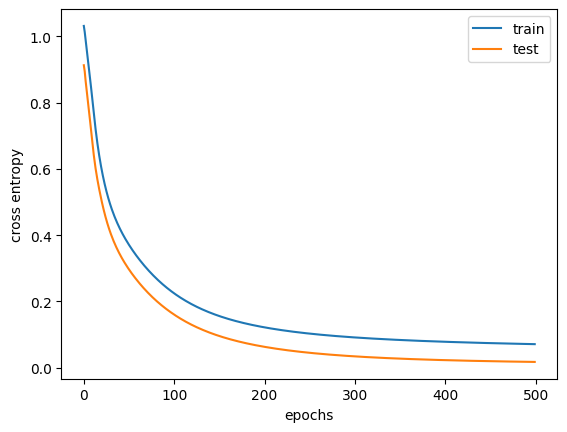

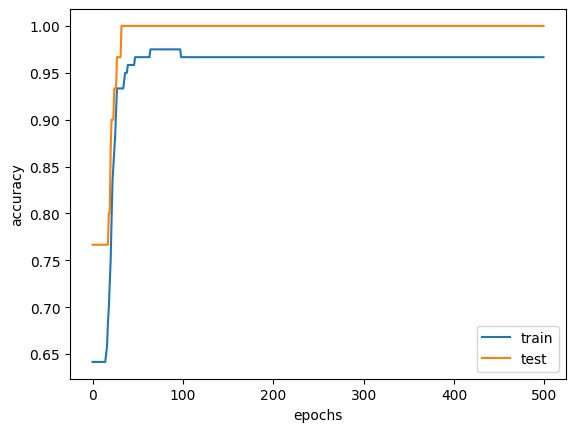

In [51]:
# prepare model and training parameters
epochs = 500
batch = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            
            # update weights
            optimizer.step()
            
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

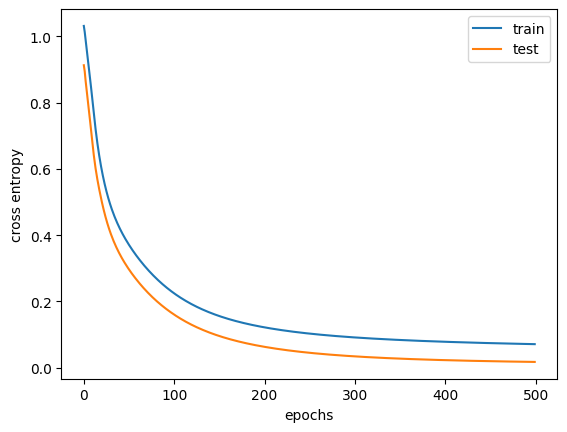

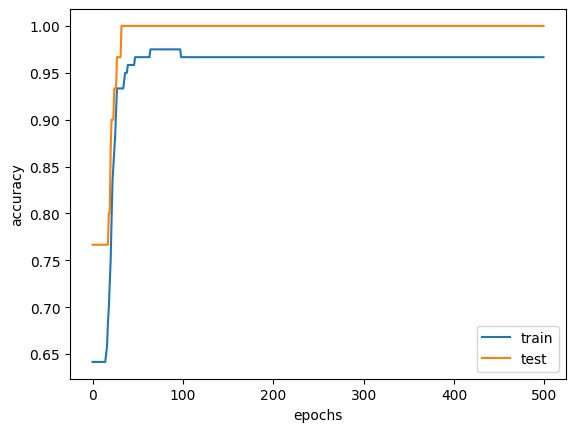

In [52]:
import matplotlib.pyplot as plt

plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()